In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# find distribution of scores across the three hospitals
def hospital_score_distribution(data_file):
    # read in the data
    df = pd.read_csv(data_file)

    hospital = os.path.basename(data_file).split('_')[0]
    if 'LUS' in hospital:
        hospital = 'JCUH'

    # change empty strings to NaN
    df.replace('', pd.NA, inplace=True)

    # don't count duplicates    
    df.drop_duplicates(subset=['Patient ID', 'Scan No', 'Scan Label'], inplace=True)

    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
    
    # Deterministically assign 1.5 scores: first half to 1, second half to 2
    mask_1_5 = df['Score'] == 1.5
    indices_1_5 = df[mask_1_5].index
    half_point = len(indices_1_5) // 2

    df.loc[indices_1_5[:half_point], 'Score'] = 1
    df.loc[indices_1_5[half_point:], 'Score'] = 2

    df['Score'] = df['Score'].astype('Int64')

    # count score occurences
    distribution = df['Score'].value_counts().sort_index()

    # plot bar chart
    distribution.plot(kind='bar', title=hospital, xlabel='Score', ylabel='Count')
    return distribution





In [3]:
# count score distribution for each of the four scan numbers
def scan_number_score_distribution(data_file):
    # read in the data
    df = pd.read_csv(data_file)

    hospital = os.path.basename(data_file).split('_')[0]
    if 'LUS' in hospital:
        hospital = 'JCUH'

    # change empty strings to NaN
    df.replace('', pd.NA, inplace=True)

    # don't count duplicates    
    df.drop_duplicates(subset=['Patient ID', 'Scan No', 'Scan Label'], inplace=True)

    df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

    # Deterministically assign 1.5 scores: first half to 1, second half to 2
    mask_1_5 = df['Score'] == 1.5
    indices_1_5 = df[mask_1_5].index
    half_point = len(indices_1_5) // 2

    df.loc[indices_1_5[:half_point], 'Score'] = 1
    df.loc[indices_1_5[half_point:], 'Score'] = 2

    df['Score'] = df['Score'].astype('Int64')


    scan_nos = sorted(df['Scan No'].unique(), key=lambda x: int(str(x)[-1]))


    distributions = {}
    for label in scan_nos:
        label_df = df[df['Scan No'] == label]
        distribution = label_df['Score'].value_counts().sort_index()
        distributions[label] = distribution

    # Create grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Get all possible scores
    all_scores = sorted(df['Score'].dropna().unique())
    
    # Set width and positions for bars
    bar_width = 0.2
    x = range(len(all_scores))
    num_scans = len(scan_nos)
    blues = plt.cm.Blues([(i + 3) / (num_scans + 2) for i in range(num_scans)])
    
    # Plot bars for each scan number
    for i, scan_no in enumerate(scan_nos):
        counts = [distributions[scan_no].get(score, 0) for score in all_scores]
        positions = [pos + (i * bar_width) for pos in x]
        ax.bar(positions, counts, bar_width, label=f'Scan No: {scan_no}', color=blues[i]) 
    
    # Set labels and title
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_title(f'Score Distribution by Scan Number - {hospital}')
    ax.set_xticks([pos + bar_width * 1.5 for pos in x])
    ax.set_xticklabels(all_scores)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

    return distributions

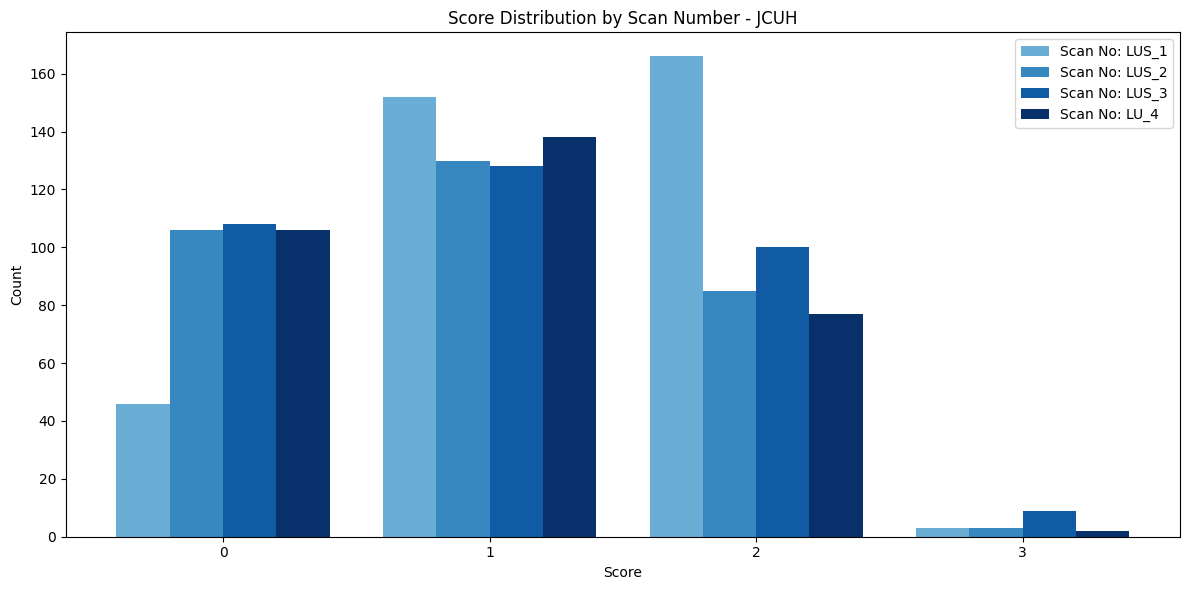

{'LUS_1': Score
 0     46
 1    152
 2    166
 3      3
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    106
 1    130
 2     85
 3      3
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    108
 1    128
 2    100
 3      9
 Name: count, dtype: Int64,
 'LU_4': Score
 0    106
 1    138
 2     77
 3      2
 Name: count, dtype: Int64}

In [4]:
scan_number_score_distribution('LUS_data.csv')

Score
0    366
1    548
2    428
3     17
Name: count, dtype: Int64

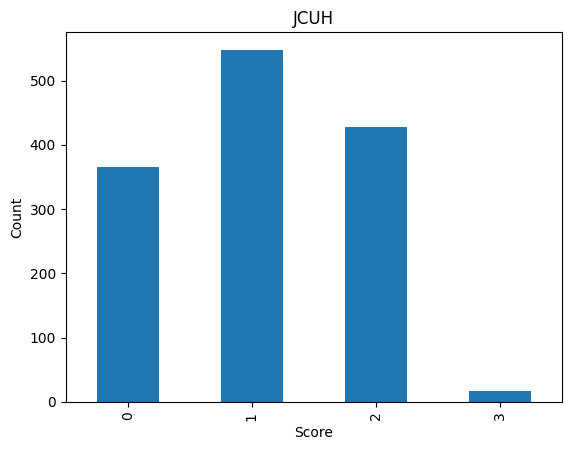

In [5]:
hospital_score_distribution('LUS_data.csv')

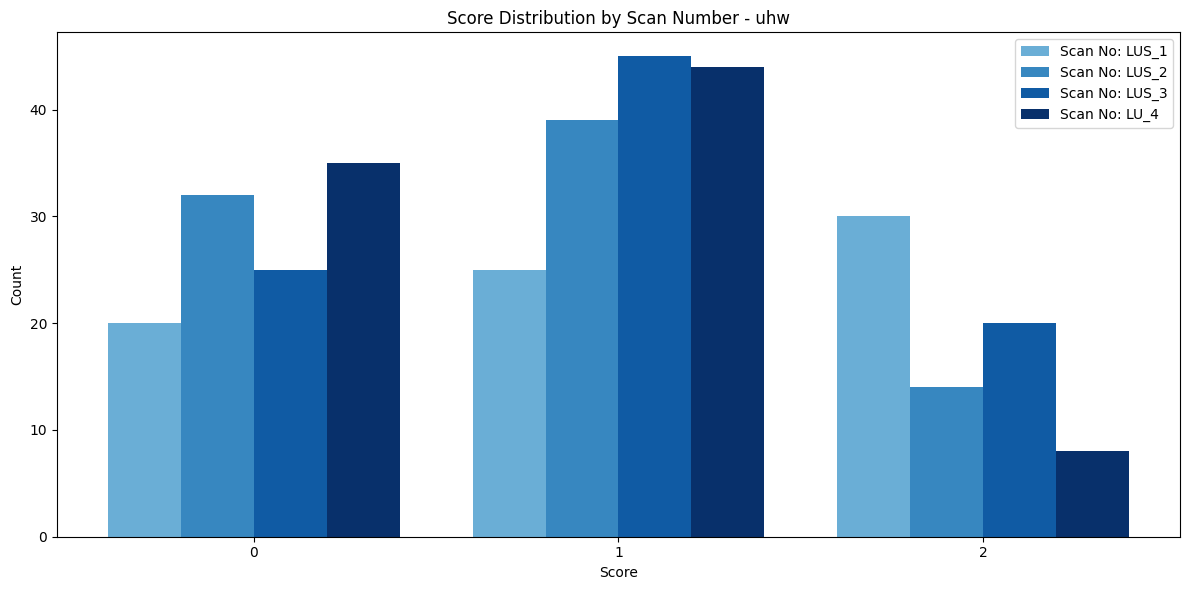

{'LUS_1': Score
 0    20
 1    25
 2    30
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    32
 1    39
 2    14
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    25
 1    45
 2    20
 Name: count, dtype: Int64,
 'LU_4': Score
 0    35
 1    44
 2     8
 Name: count, dtype: Int64}

In [6]:
scan_number_score_distribution('uhw_data.csv')

Score
0    112
1    153
2     72
Name: count, dtype: Int64

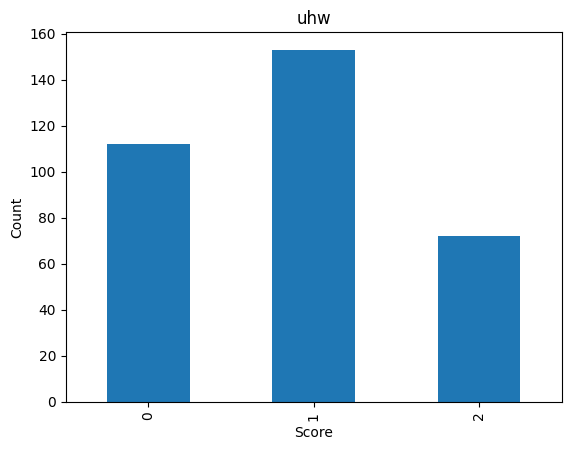

In [7]:
hospital_score_distribution('uhw_data.csv')

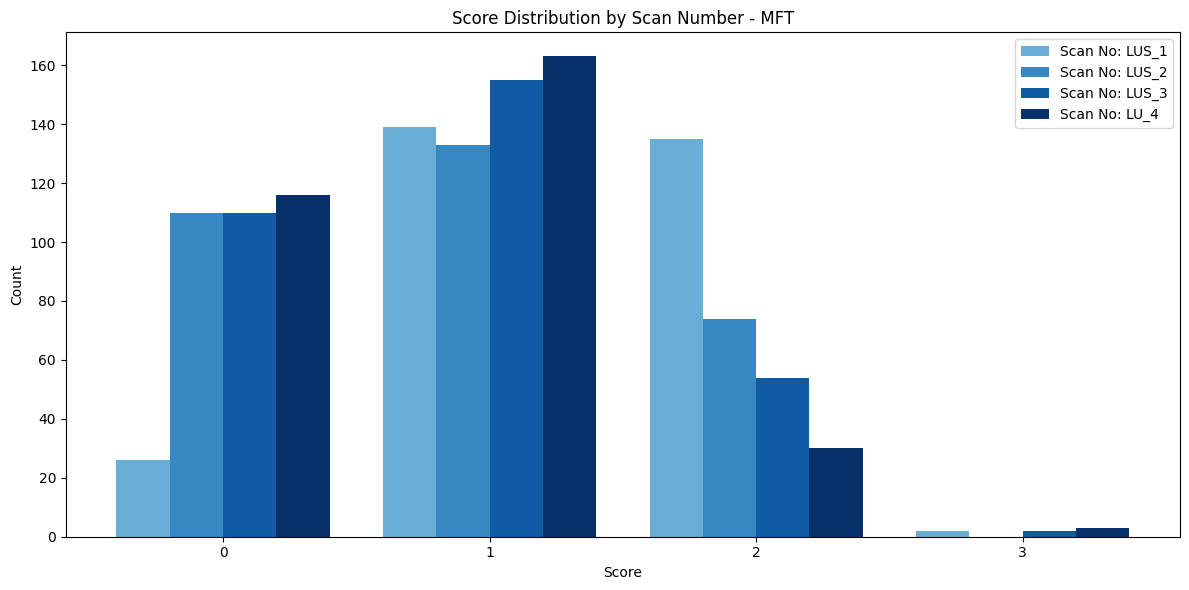

{'LUS_1': Score
 0     26
 1    139
 2    135
 3      2
 Name: count, dtype: Int64,
 'LUS_2': Score
 0    110
 1    133
 2     74
 Name: count, dtype: Int64,
 'LUS_3': Score
 0    110
 1    155
 2     54
 3      2
 Name: count, dtype: Int64,
 'LU_4': Score
 0    116
 1    163
 2     30
 3      3
 Name: count, dtype: Int64}

In [8]:
scan_number_score_distribution('MFT_data.csv')

Score
0    362
1    590
2    293
3      7
Name: count, dtype: Int64

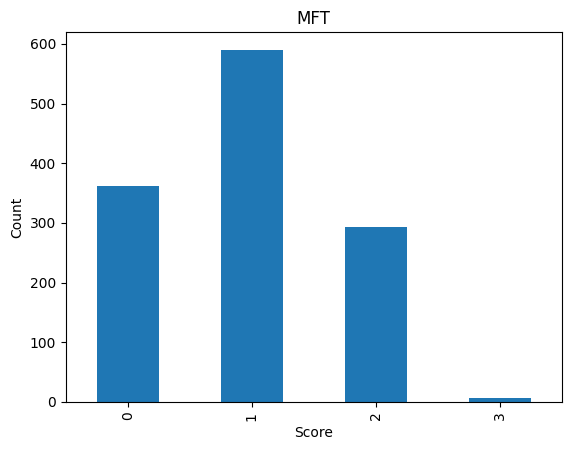

In [9]:
hospital_score_distribution('MFT_data.csv')